In [1]:
import os, nibabel as nib, numpy as np, matplotlib.pyplot as plt, shutil
import pandas as pd, pickle
import intensity_normalization as itn
import time

%matplotlib inline

In [47]:
root_dir = '../data/ADNI/'
mask_root_dir = '../data/raw_labels/'
img_save_dir = '../data/image/'
mask_save_dir = '../data/mask/'

# subjects = [f for f in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, f))]

# for index, subject in enumerate(subjects):
    
#     for i, (dir_path, dir_names, file_names) in enumerate(os.walk(os.path.join(root_dir, subject))):

#         pass
    
#     if len(file_names) == 1: 
#         image_name = file_names[0]
#         new_image_name = image_name.split('_MR_')[0].split('ADNI_')[1]+'.nii'
        
#         shutil.copy(os.path.join(dir_path, image_name), os.path.join(img_save_dir, new_image_name))
# #         print(image_name)
        

# #         print(image_arr.shape)
        
# #         if image_arr.shape != (197, 233, 189) : print(dir_path, image_name)
        
#     else:
#         print("There are %d images in %s"%(len(file_names), dir_path))
    
# #     break

for mask in sorted(os.listdir(mask_root_dir)):
    
    if 'CSF' in mask: continue
        
    else:
        
        subject_name = '_'.join(mask.split('_')[1:4])
        
        if 'L' in mask: subject_name+='_L.nii'
        elif 'R' in mask: subject_name+='_R.nii'
        
#         shutil.copy(os.path.join(mask_root_dir, mask), os.path.join(mask_save_dir, subject_name))
        
        print(subject_name)
        
#     break
        
#         print(os.path.join(mask_root_dir, mask))

023_S_0031_L.nii
002_S_0938_L.nii
005_S_0448_L.nii
003_S_0907_R.nii
100_S_0995_L.nii
131_S_0384_R.nii
002_S_1280_R.nii
012_S_0689_R.nii
002_S_1070_L.nii
029_S_4279_L.nii
127_S_0260_L.nii
010_S_0419_R.nii
023_S_0139_R.nii
130_S_4730_L.nii
031_S_1209_L.nii
018_S_4696_R.nii
011_S_0002_L.nii
003_S_0908_L.nii
003_S_1059_L.nii
027_S_1385_L.nii
011_S_0856_L.nii
002_S_0816_R.nii
023_S_0916_R.nii
123_S_0108_R.nii
016_S_1092_R.nii
010_S_0422_R.nii
011_S_0183_R.nii
100_S_0892_R.nii
067_S_0812_L.nii
123_S_0088_L.nii
127_S_0393_L.nii
013_S_1186_R.nii
126_S_1340_L.nii
002_S_1155_L.nii
127_S_0397_R.nii
131_S_0691_R.nii
023_S_0376_L.nii
082_S_1079_L.nii
002_S_0559_L.nii
013_S_0325_L.nii
136_S_0429_L.nii
005_S_1341_R.nii
067_S_1185_L.nii
Store
003_S_4142_R.nii
003_S_4136_R.nii
123_S_0162_R.nii
133_S_0525_R.nii
126_S_0784_L.nii
009_S_1334_L.nii
126_S_0606_R.nii
009_S_0862_L.nii
123_S_0094_L.nii
100_S_0006_R.nii
011_S_0016_L.nii
094_S_4089_R.nii
011_S_0021_L.nii
012_S_1292_R.nii
016_S_1263_R.nii
013_S_47

In [2]:
root_dir = '../data/ADNI/'
image_name = image.split('_MR_')[0].split('ADNI_')[1]
image_nii = nib.load(os.path.join(root_dir, image))

label_dir = './Released_data_NII_v1.3/Labels_100_NIFTI/'
selected_files = [file for file in os.listdir(label_dir) if image_name in file and 'CSF' not in file]

print(selected_files)

left_label = selected_files[0]; right_label = selected_files[1]

left_label_arr = nib.load(os.path.join(label_dir, left_label)).get_data()
right_label_arr = nib.load(os.path.join(label_dir, right_label)).get_data()

NameError: name 'image' is not defined

In [6]:
data_dir = '../data/zscore_image/'

from glob import glob

image_arr = np.rot(nib.load('../sample_image.nii.gz').get_data()
right_label_arr = nib.load('../sample_right_mask.nii').get_data()
left_label_arr = nib.load('../sample_left_mask.nii').get_data()

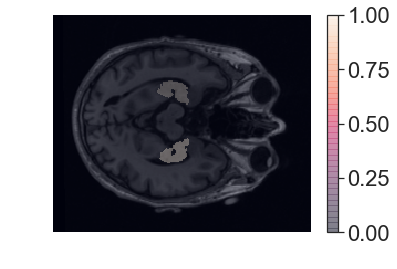

In [22]:
# image array check

num_slice = 73

plt.imshow(image_arr[:, :, num_slice], cmap='gray')
plt.imshow(left_label_arr[:, :, num_slice], alpha=0.3)
plt.imshow(right_label_arr[:, :, num_slice], alpha=0.3)
plt.axis('off')
plt.colorbar()
plt.show(); plt.close()

In [62]:
## data label check

data_file = pd.read_csv('../data/study_population_135.csv').to_dict()
label_dict_file = '../data/label_dict.pickle'

group_data = data_file['Group']

group2val = {
    'CN' : 0,
    'MCI' : 1,
    'AD': 2
}

label_dict = dict()

for key, value in data_file['Subject'].items():
    
#     print( value, group_data[key], group2val[group_data[key]])
    
    label_dict[value] = group2val[group_data[key]]
    
#     break
    
# save
with open(label_dict_file, 'wb') as handle:
    pickle.dump(label_dict, handle)
    
with open(label_dict_file, 'rb') as handle:
    loaded_label_dict = pickle.load(handle)

if loaded_label_dict == label_dict: print('label dictionary saved')
else: os.remove(label_dict_file)

002_S_0295 CN 0
002_S_0413 CN 0
002_S_0559 CN 0
002_S_0685 CN 0
002_S_0729 MCI 1
002_S_0782 MCI 1
002_S_0816 AD 2
002_S_0938 AD 2
002_S_0954 MCI 1
002_S_1070 MCI 1
002_S_1155 MCI 1
002_S_1261 CN 0
002_S_1280 CN 0
002_S_4225 CN 0
003_S_0907 CN 0
003_S_0908 MCI 1
003_S_0931 CN 0
003_S_1057 MCI 1
003_S_1059 AD 2
003_S_1074 MCI 1
003_S_1122 MCI 1
003_S_1257 AD 2
003_S_4136 AD 2
003_S_4142 AD 2
005_S_0221 AD 2
005_S_0222 MCI 1
005_S_0448 MCI 1
005_S_0602 CN 0
005_S_1341 AD 2
006_S_0322 MCI 1
006_S_4192 AD 2
006_S_4449 CN 0
007_S_0101 MCI 1
007_S_0128 MCI 1
007_S_1304 AD 2
007_S_4387 CN 0
009_S_0842 CN 0
009_S_0862 CN 0
009_S_1030 MCI 1
009_S_1334 AD 2
010_S_0067 CN 0
010_S_0419 CN 0
010_S_0422 MCI 1
011_S_0002 CN 0
011_S_0005 CN 0
011_S_0010 AD 2
011_S_0016 CN 0
011_S_0021 CN 0
011_S_0183 AD 2
011_S_0241 MCI 1
011_S_0856 MCI 1
012_S_0689 AD 2
012_S_1292 MCI 1
012_S_1321 MCI 1
013_S_0325 MCI 1
013_S_0592 AD 2
013_S_1186 MCI 1
013_S_1276 CN 0
013_S_4731 CN 0
016_S_0769 MCI 1
016_S_0991 AD 2
0

### Intensity normalization

### Feature Extraction

In [4]:
from radiomics import featureextractor
import SimpleITK as sitk
import pandas as pd
import os
import nibabel as nib
import numpy as np
import copy
import argparse
import sys
import cv2
import pywt
import imageio

from skimage.transform import resize as resize

In [22]:
img_folder = '../data/zscore_image/'
mask_folder = '../data/right_mask/'
params = './featureConfig.json'
save_filename = '../result/sample.csv'

def read_image(file):
    if '.nii' in file:
        img_arr = nib.load(file).get_data().astype('float')
    else:
        img_arr = imageio.imread(file)

    im_3d = sitk.GetImageFromArray(img_arr)
    return im_3d

def result2val(result, wv=False):
    vals, columns = [], []

    for key, val in result.items():
        if 'diagnostics' in key : continue
            
        if wv:
            if 'shape' in key : continue
        
        columns.append(key.split('original_')[1])
        vals.append(val)

    return vals, columns

def apply_wavelet(img_arr):
    coeffs2 = pywt.dwtn(img_arr, 'sym4')
    return coeffs2

In [23]:
extractor = featureextractor.RadiomicsFeaturesExtractor(params)

start = time.time()
feature_dict = dict()

for image, mask in zip(sorted(os.listdir(img_folder)),sorted(os.listdir(mask_folder))):
    
    print(image, mask)
    
    whole_vals = []
    whole_cols = []
    
    subject_name = image.split('.nii')[0]
    
#     image_nii = nib.load(os.path.join(img_folder, image))
#     mask_nii = nib.load(os.path.join(mask_folder, mask))
    
    # check image size and mask size
    
#     if image_nii.shape != mask_nii.shape : 
#         print('shape difference in ', image)
#         continue
    
    # intensity normalization
#     normalized_img_nii = itn.normalize.zscore.zscore_normalize(image_nii)
#     nib.save(normalized_img_nii, os.path.join(zscore_dir, image+'.gz'))

    # original feature extraction

    img = read_image(os.path.join(img_folder, image))
    mask = read_image(os.path.join(mask_folder, mask))
    
    print('image loaded')
    
    result = extractor.execute(img, mask) # takes long time
    vals, columns = result2val(result, wv=False)

    whole_cols.extend(columns)
    whole_vals.extend(vals)
    
    img_arr = sitk.GetArrayFromImage(img)
    wv_imgs = apply_wavelet(img_arr)

    for index, (key, wv_img) in enumerate(wv_imgs.items()):

        resized_arr = resize(wv_img, img_arr.shape, preserve_range=True, order=1) # bilinear interpolation
        wv_img = sitk.GetImageFromArray(resized_arr)
        
        result = extractor.execute(wv_img, mask) # takes long time
        wv_vals, wv_columns = result2val(result, wv=True)
            
        wv_columns = [a + '_wv_' + str(index+1) for a in wv_columns]

        whole_cols.extend(wv_columns)
        whole_vals.extend(wv_vals)
        
        del wv_img

#         break
    
    feature_dict[subject_name] = whole_vals
    
    del img
    del mask
    del img_arr
    del wv_imgs
    
    break
    
end = time.time()
print(end - start, ' seconds')

# 4. Convert dict  -> Dataframe -> excel

df = pd.DataFrame.from_dict(feature_dict).T
df.columns = whole_cols
df.to_csv(save_filename)

print('saved')

002_S_0295.nii.gz 002_S_0295_R.nii
image loaded


GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWar

14.938838958740234  seconds
saved


In [ ]:
# 0. get arguments

parser = argparse.ArgumentParser(description="feature extraction parameters")
parser.add_argument("-o", dest = "file_name", help="output file name")
parser.add_argument("-i", dest = "image_folder", help="image directory")
parser.add_argument("-m", dest = "mask_folder", help="mask directory")
parser.add_argument("--nii", dest = "is_nii", default= False, help="is nifti file", type=bool)
parser.add_argument("-p", dest = "params", help="parameter setting file name", default = 'featureConfig.json')
parser.add_argument("-s", dest = "img_size", help="image size", default = 512, type=int)
parser.add_argument("-y", dest = "year", type=int)

args = parser.parse_args()

# 1. read images

def read_image(file):
    if '.nii' in file:
        img_arr = nib.load(file).get_data()
    else:
        img_arr = imageio.imread(file)

    im_3d = sitk.GetImageFromArray(img_arr)
    return im_3d

def result2val(result, wv=False):
    vals, columns = [], []

    for key, val in result.items():
        if 'diagnostics' in key : continue
            
        if wv:
            if 'shape' in key : continue
        
        columns.append(key.split('original_')[1])
        vals.append(val)

    return vals, columns

def apply_wavelet(img_arr):
    coeffs2 = pywt.dwt2(img_arr, 'sym4')
#     _, (LH, HL, _) = coeffs2
    _, (LLL, LLH, LHL, LHH, HLL, HLH, HHL, HHH) = coeffs2
    return [LLL, LLH, LHL, LHH, HLL, HLH, HHL, HHH]

def wv2itk(img_arr):
    img_arr = cv2.resize(img_arr, (512, 512), interpolation=cv2.INTER_AREA)
    img_arr = np.expand_dims(img_arr, axis=2)
    im_3d = sitk.GetImageFromArray(img_arr)
    return im_3d

# 2. feature settings

params = args.params
extractor = featureextractor.RadiomicsFeaturesExtractor(params)
feature_dict = dict()

imgs = os.listdir(args.image_folder)
masks = os.listdir(args.mask_folder)

errors = []

if len(imgs) != len(masks):
    raise Exception (' length of images and masks should be same ')
    sys.exit()

# 3. Extract features
i = 0
for sample_image, sample_mask in zip(sorted(imgs), sorted(masks)):
    i += 1
    print(sample_image, sample_mask, '(', i+1, '/', len(imgs), ')')

    whole_vals = []
    whole_cols = []
    
    try:
        img = read_image(os.path.join(args.image_folder, sample_image))
        mask = read_image(os.path.join(args.mask_folder, sample_mask))

        if '2018_' in sample_image:
            subject_name = '2018_' + sample_image.split('_')[1]

        result = extractor.execute(img, mask) # takes long time
        vals, columns = result2val(result, wv=False)

        whole_cols.extend(columns)
        whole_vals.extend(vals)

        if args.is_nii:
            img_arr = nib.load(os.path.join(args.image_folder, sample_image)).get_data()
        else:
            img_arr = imageio.imread(os.path.join(args.image_folder, sample_image))

        for j, wv_arr in enumerate(apply_wavelet(img_arr)):
            
            wv_img = wv2itk(wv_arr)
            result = extractor.execute(wv_img, mask) # takes long time
            wv_vals, wv_columns = result2val(result, wv=True)
            
            wv_columns = [a + '_wv_' + str(j+1) for a in wv_columns]
            
            whole_cols.extend(wv_columns)
            whole_vals.extend(wv_vals)

        feature_dict[subject_name] = whole_vals
    except Exception as error:
        print(error)
        errors.append(sample_image)

print('===== error extracting features =====')
print(errors)
print('===== ===== ===== ===== ===== ===== =====')

# 4. Convert dict  -> Dataframe -> excel

df = pd.DataFrame.from_dict(feature_dict).T
df.columns = whole_cols
df.to_excel(args.file_name)

## Make Clinical Dataset

In [29]:
study_file = '../data/study_population_135.csv'

pop_ = pd.read_csv(study_file)
# print(pop_.columns)

sex_conversion = {
    'M' : [1, 0],
    'F' : [0, 1]
}

clinical_data = dict()

for key, value in pop_[['Subject', 'Sex', 'Age']].iterrows():
    
    print('Subject :', value['Subject'])
#     print('Sex :', sex_conversion[value['Sex']])
#     print('Age :', value['Age'])
    
    clinic_data = [*sex_conversion[value['Sex']], value['Age']]
    clinical_data[value['Subject']] = clinic_data
    
    break

# with open('../data/clinical_data.pickle', 'wb') as file:
#     pickle.dump(clinical_data, file)
    
# with open('../data/clinical_data.pickle', 'rb') as file:
#     print(pickle.load(file))

Subject : 002_S_0295
Subject : 002_S_0413
Subject : 002_S_0559
Subject : 002_S_0685
Subject : 002_S_0729
Subject : 002_S_0782
Subject : 002_S_0816
Subject : 002_S_0938
Subject : 002_S_0954
Subject : 002_S_1070
Subject : 002_S_1155
Subject : 002_S_1261
Subject : 002_S_1280
Subject : 002_S_4225
Subject : 003_S_0907
Subject : 003_S_0908
Subject : 003_S_0931
Subject : 003_S_1057
Subject : 003_S_1059
Subject : 003_S_1074
Subject : 003_S_1122
Subject : 003_S_1257
Subject : 003_S_4136
Subject : 003_S_4142
Subject : 005_S_0221
Subject : 005_S_0222
Subject : 005_S_0448
Subject : 005_S_0602
Subject : 005_S_1341
Subject : 006_S_0322
Subject : 006_S_4192
Subject : 006_S_4449
Subject : 007_S_0101
Subject : 007_S_0128
Subject : 007_S_1304
Subject : 007_S_4387
Subject : 009_S_0842
Subject : 009_S_0862
Subject : 009_S_1030
Subject : 009_S_1334
Subject : 010_S_0067
Subject : 010_S_0419
Subject : 010_S_0422
Subject : 011_S_0002
Subject : 011_S_0005
Subject : 011_S_0010
Subject : 011_S_0016
Subject : 011

In [ ]:
import nibabel as nib

from skimage.measure import label, regionprops
from glob import glob
import os

data_dir = '../data/image'
data_list = sorted(glob(os.path.join(data_dir, '*.nii')))

mask_dir = '../data/left_mask'
mask_list = sorted(glob(os.path.join(mask_dir, '*.nii')))

nii2np = lambda x : nib.load(x).get_data()

for image, mask in zip(data_list, mask_list):
    img_arr, mask_arr = nii2np(image), nii2np(mask)

    print(img_arr.shape, mask_arr.shape)

    mask_arr = label(mask_arr)
    regions = regionprops(mask_arr)

    print(len(regions))

    break